# Sentiment Analysis
  The tweets.csv file contains the following columns:
 - target: the polarity of the tweet (0 = negative, 4 = positive)
 - ids: The id of the tweet ( 2087)
 - date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)
 - flag: The query (lyx). If there is no query, then this value is NO_QUERY.
 - user: the user that tweeted (robotickilldozr)
 - text: the text of the tweet (Lyx is cool)

In [ ]:
%%bash

# Need to install pyspark
# if pyspark is already installed, will print a message indicating pyspark already isntalled
pip install pyspark

# Download tweets.csv from github
# If the tweets.csv file does not exist in the colab environment
if [[ ! -f ./tweets.csv ]]; then 
   # download tweets.csv file from github and save it in this colab environment instance
   wget https://raw.githubusercontent.com/wewilli1/ist718_data/master/tweets.csv   
fi

# vefify tweets.csv exits in the colab env - should not print an error message
ls tweets.csv

  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612243 sha256=eec98efcfa94d262d86dc4ac12f7b0a5154697e0a3767ea46a098666cffb8f62
  Stored in directory: /root/.cache/pip/wheels/5e/bd/07/031766ca628adec8435bb40f0bd83bb676ce65ff4007f8e73f
Successfully built pyspark
tweets.csv


--2020-10-21 20:42:37--  https://raw.githubusercontent.com/wewilli1/ist718_data/master/tweets.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13727793 (13M) [text/plain]
Saving to: ‘tweets.csv’

     0K .......... .......... .......... .......... ..........  0% 1.97M 7s
    50K .......... .......... .......... .......... ..........  0% 4.40M 5s
   100K .......... .......... .......... .......... ..........  1% 10.9M 4s
   150K .......... .......... .......... .......... ..........  1% 6.81M 3s
   200K .......... .......... .......... .......... ..........  1% 7.20M 3s
   250K .......... .......... .......... .......... ..........  2% 9.52M 3s
   300K .......... .......... .......... .......... ..........  2% 8.41M 2s
   350K .......... .......... .......... .

In [ ]:
# import statements
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext
sqlContext = SQLContext(sc)

In [ ]:
# example code to read the downloaded tweets.csv file on colab
tweets_df = spark.read.format("csv").option("header", "true").load("tweets.csv")
tweets_df.take(5)

[Row(target='4', id='1467822272', date='Mon Apr 06 22:22:45 PDT 2009', flag='NO_QUERY', user='ersle', text='I LOVE @Health4UandPets u guys r the best!! '),
 Row(target='4', id='1467822273', date='Mon Apr 06 22:22:45 PDT 2009', flag='NO_QUERY', user='becca210', text='im meeting up with one of my besties tonight! Cant wait!!  - GIRL TALK!!'),
 Row(target='4', id='1467822283', date='Mon Apr 06 22:22:46 PDT 2009', flag='NO_QUERY', user='Wingman29', text='@DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart. '),
 Row(target='4', id='1467822287', date='Mon Apr 06 22:22:46 PDT 2009', flag='NO_QUERY', user='katarinka', text='Being sick can be really cheap when it hurts too much to eat real food  Plus, your friends make you soup'),
 Row(target='4', id='1467822293', date='Mon Apr 06 22:22:46 PDT 2009', flag='NO_QUERY', user='_EmilyYoung', text='@LovesBrooklyn2 he has that effect on everyone ')]

In [ ]:
enable_grid = True
%matplotlib inline
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext
sqlContext = SQLContext(sc)
import os

# Define a function to determine if we are running on data bricks
# Return true if running in the data bricks environment, false otherwise
def is_databricks():
    # get the databricks runtime version
    db_env = os.getenv("DATABRICKS_RUNTIME_VERSION")
    
    # if running on data bricks
    if db_env != None:
        return True
    else:
        return False

# Define a function to read the data file.  The full path data file name is constructed
# by checking runtime environment variables to determine if the runtime environment is 
# databricks, or a student's personal computer.  The full path file name is then
# constructed based on the runtime env.
# 
# Params
#   data_file_name: The base name of the data file to load
# 
# Returns the full path file name based on the runtime env
#
# Correct Usage Example (pass ONLY the full file name):
#   file_name_to_load = get_training_filename("sms_spam.csv") # correct - pass ONLY the full file name  
#   
# Incorrect Usage Example
#   file_name_to_load = get_training_filename("/sms_spam.csv") # incorrect - pass ONLY the full file name
#   file_name_to_load = get_training_filename("sms_spam.csv/") # incorrect - pass ONLY the full file name
#   file_name_to_load = get_training_filename("c:/users/will/data/sms_spam.csv") incorrect -pass ONLY the full file name
def get_training_filename(data_file_name):    
    # if running on data bricks
    if is_databricks():
        # build the full path file name assuming data brick env
        full_path_name = "dbfs:/FileStore/tables/%s" % data_file_name
    # else the data is assumed to be in the same dir as this notebook
    else:
        # Assume the student is running on their own computer and load the data
        # file from the same dir as this notebook
        full_path_name = data_file_name
    
    # return the full path file name to the caller
    return full_path_name

In [ ]:
from pyspark.sql import functions as fn
import requests
from pyspark.ml.feature import StopWordsRemover
from pyspark.ml.feature import Tokenizer
from pyspark.ml.feature import CountVectorizer
from pyspark.ml.feature import IDF
from pyspark.ml import feature
from pyspark.ml import classification
from pyspark.ml import feature, regression, evaluation, Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.classification import LogisticRegression
import pandas as pd
from pyspark.ml.tuning import ParamGridBuilder
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
tweets_df = spark.read.format("csv").option("header", "true").load(get_training_filename("tweets.csv")).drop('id', 'date', 'flag', 'user')

# transform 4 to 1
tweets_df = tweets_df.withColumn('target', fn.regexp_replace(fn.col('target'), '4', '1'))
# change data type to integer
tweets_df = tweets_df.withColumn('target', fn.col('target').cast('Integer'))

# check transformation
tweets_df.select('target').distinct().show()
# count and percentage of positive and negative tweets
tweets_df.groupBy('target').count().withColumn('percentage', (fn.col('count')/tweets_df.count()*100)).show()

+------+
|target|
+------+
|     1|
|     0|
+------+

+------+-----+----------+
|target|count|percentage|
+------+-----+----------+
|     1|50000|      50.0|
|     0|50000|      50.0|
+------+-----+----------+



In [ ]:
tweets_pd = tweets_df.toPandas()
display(tweets_pd.head())
print(tweets_pd.shape)

,target,text
0,1,I LOVE @Health4UandPets u guys r the best!!
1,1,im meeting up with one of my besties tonight! ...
2,1,"@DaRealSunisaKim Thanks for the Twitter add, S..."
3,1,Being sick can be really cheap when it hurts t...
4,1,@LovesBrooklyn2 he has that effect on everyone


(100000, 2)


In [ ]:
# tokenize the text column
tokenizer = Tokenizer().setInputCol('text').setOutputCol('words')

# load stop words
stop_words = requests.get('http://ir.dcs.gla.ac.uk/resources/linguistic_utils/stop_words').text.split()
stop_words[0:10]

# stop words filter
sw_filter = StopWordsRemover()\
  .setStopWords(stop_words)\
  .setCaseSensitive(False)\
  .setInputCol("words")\
  .setOutputCol("filtered")

# CountVectorizer
cv = CountVectorizer(minTF=1., minDF=5.)\
  .setInputCol("filtered")\
  .setOutputCol("tf")

# idf
idf = IDF().\
    setInputCol('tf').\
    setOutputCol('tfidf')

# pipeline
tweets_pre_proc_pipe = Pipeline(stages = [tokenizer, sw_filter, cv, idf]).fit(tweets_df)
tweets_pre_proc_df = tweets_pre_proc_pipe.transform(tweets_df)
tweets_pre_proc_df.show()

print('num words: ', len(tweets_pre_proc_pipe.stages[2].vocabulary))
print('num rows: ', tweets_pre_proc_df.count())

+------+--------------------+--------------------+--------------------+--------------------+--------------------+
|target|                text|               words|            filtered|                  tf|               tfidf|
+------+--------------------+--------------------+--------------------+--------------------+--------------------+
|     1|I LOVE @Health4Ua...|[i, love, @health...|[love, @health4ua...|(13693,[11,19,145...|(13693,[11,19,145...|
|     1|im meeting up wit...|[im, meeting, up,...|[im, meeting, bes...|(13693,[0,5,15,24...|(13693,[0,5,15,24...|
|     1|@DaRealSunisaKim ...|[@darealsunisakim...|[@darealsunisakim...|(13693,[9,29,31,2...|(13693,[9,29,31,2...|
|     1|Being sick can be...|[being, sick, can...|[sick, really, ch...|(13693,[0,14,41,9...|(13693,[0,14,41,9...|
|     1|@LovesBrooklyn2 h...|[@lovesbrooklyn2,...|[@lovesbrooklyn2,...|(13693,[2793],[1.0])|(13693,[2793],[8....|
|     1|@ProductOfFear Yo...|[@productoffear, ...|[@productoffear, ...|(13693,[0,1,14,29

In [ ]:
display(tweets_pre_proc_df.toPandas().head())

,target,text,words,filtered,tf,tfidf
0,1,I LOVE @Health4UandPets u guys r the best!!,"[i, love, @health4uandpets, u, guys, r, the, b...","[love, @health4uandpets, u, guys, r, best!!]","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,1,im meeting up with one of my besties tonight! ...,"[im, meeting, up, with, one, of, my, besties, ...","[im, meeting, besties, tonight!, wait!!, , -, ...","(1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","(1.1265280578718189, 0.0, 0.0, 0.0, 0.0, 3.183..."
2,1,"@DaRealSunisaKim Thanks for the Twitter add, S...","[@darealsunisakim, thanks, for, the, twitter, ...","[@darealsunisakim, thanks, twitter, add,, suni...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,1,Being sick can be really cheap when it hurts t...,"[being, sick, can, be, really, cheap, when, it...","[sick, really, cheap, hurts, eat, real, food, ...","(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(1.1265280578718189, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,1,@LovesBrooklyn2 he has that effect on everyone,"[@lovesbrooklyn2, he, has, that, effect, on, e...","[@lovesbrooklyn2, effect]","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


Based on the number of words and the size of the dataset, I do not expect the logistic regression model to overfit. There are 13,693 words and the dataset contains 100,000 rows. There are significantly more number of rows than the number of words, therefore, overfitting is not going to be an issue. 

In [ ]:
# collect all the vocabulary
words = tweets_pre_proc_pipe.stages[2].vocabulary
# extract idf score
idf_score = tweets_pre_proc_pipe.stages[-1].idf

# make dataframe and sort by importance (idf score)
idf_df = pd.DataFrame({'words': words, 'idf_score': idf_score})
least_imp_idf = idf_df.sort_values('idf_score').reset_index(drop=True).head()
most_imp_idf = idf_df.sort_values('idf_score', ascending=False).reset_index(drop=True).head()


In [ ]:
display(most_imp_idf)
display(least_imp_idf)

,words,idf_score
0,blended,9.721176
1,sleeeep,9.721176
2,initially,9.721176
3,nick.,9.721176
4,live!,9.721176


,words,idf_score
0,,1.126528
1,just,2.588812
2,i'm,2.645649
3,good,3.015945
4,like,3.113850


IDF stands for Inverse Document Frequency. The IDF score decreases as a term appears in many documents in the corpus. In other words, it penalizes the terms that appear in many documents, thus, making those terms less important by assigning low idf score.

In [ ]:
# split data
training_df, validation_df, testing_df = tweets_df.randomSplit([0.6, 0.3, 0.1], seed=0)

# initiate logistic regression
lr = LogisticRegression().\
    setLabelCol('target').\
    setFeaturesCol('tfidf').\
    setRegParam(0.0).\
    setMaxIter(100).\
    setElasticNetParam(0.)

# pipeline with tweets_pre_proc_pipe and logistic regression 
lr_pipe = Pipeline(stages=[tweets_pre_proc_pipe, lr]).fit(training_df)

# AUC score
evaluator = BinaryClassificationEvaluator(labelCol='target')
AUC_score = evaluator.evaluate(lr_pipe.transform(testing_df))
print('AUC Score: ', AUC_score)

AUC Score:  0.7235763034983279


In [ ]:
display(lr_pipe_df_neg)
display(lr_pipe_df_pos)

,word,weight
0,adopted,-8.641777
1,selfish,-8.157059
2,depressed,-6.644970
3,update:,-6.311959
4,brutal,-6.265906
5,@milliemagsaysay,-6.040053
6,pirates,-5.925209
7,why'd,-5.904686
8,dec,-5.894391
9,last!,-5.765711


,word,weight
0,ja,7.734643
1,lotr,7.166360
2,pizza?,6.978478
3,participating,6.635875
4,ride!,6.511661
5,anyway..,5.679254
6,marvelous,5.619924
7,demi.,5.526293
8,ch?,5.113280
9,"kidding,",5.059666


The words do not make sense. For both most positive and negative vocabs, there are meaningless words such as user ids and URL. However, there are some words that make sense as well such as selfish in negative dataframe and marvelous in positive dataframe. 

In [ ]:
if enable_grid:
    # your grid search code here
    lr_pipe_1 = Pipeline(stages=[tweets_pre_proc_pipe, lr])

    # initiate grid
    grid = ParamGridBuilder().\
    addGrid(lr.regParam, [0., 0.01, 0.02, 0.03, 0.04]).\
    addGrid(lr.elasticNetParam, [0., 0.1, 0.2, 0.3, 0.4]).\
    build()

    # iterate over the number of grid and train the models
    all_models = []
    for j in range(len(grid)):
      print("Fitting model {}".format(j+1))
      model = lr_pipe_1.fit(training_df, grid[j])
      all_models.append(model)

    # calculate AUC scores for all trained models using validation data
    AUCs = [BinaryClassificationEvaluator(labelCol='target').\
            evaluate(m.transform(validation_df)) for m in all_models]
    
    # find the index of highest AUC score
    best_model_idx = np.argmax(AUCs)
    # find the best model
    best_model = all_models[best_model_idx]
    # locate the best model to find the best parameters
    print('Parameters of the best model: ', grid[best_model_idx])

    pass

Fitting model 1
Fitting model 2
Fitting model 3
Fitting model 4
Fitting model 5
Fitting model 6
Fitting model 7
Fitting model 8
Fitting model 9
Fitting model 10
Fitting model 11
Fitting model 12
Fitting model 13
Fitting model 14
Fitting model 15
Fitting model 16
Fitting model 17
Fitting model 18
Fitting model 19
Fitting model 20
Fitting model 21
Fitting model 22
Fitting model 23
Fitting model 24
Fitting model 25
Parameters of the best model:  {Param(parent='LogisticRegression_4b8864a2264b', name='regParam', doc='regularization parameter (>= 0).'): 0.02, Param(parent='LogisticRegression_4b8864a2264b', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'): 0.1}


In [ ]:
AUCs

[0.7302954648970297,
 0.7302957645361232,
 0.7302919161862773,
 0.730292604908969,
 0.7302958047861509,
 0.7712411112062999,
 0.8073725836633938,
 0.8161951794849792,
 0.813898041099142,
 0.8070612340483104,
 0.7772219544651257,
 0.8168137486151079,
 0.8074927858981366,
 0.7900602619833144,
 0.7730768165691578,
 0.7807339706099314,
 0.814836564405777,
 0.7905057336342987,
 0.7647323910736319,
 0.7447048696254198,
 0.7831853716981808,
 0.8081937177649827,
 0.7741475008409127,
 0.7449124703225365,
 0.7171341620891506]

In [ ]:
# parameters from the best model
alpha_par = 0.02
lambda_par = 0.1

# lr_pipe_2 code here
lr_2 = LogisticRegression().\
        setLabelCol('target').\
        setFeaturesCol('tfidf').\
        setRegParam(alpha_par).\
        setMaxIter(100).\
        setElasticNetParam(lambda_par)

lr_pipe_2 = Pipeline(stages=[tweets_pre_proc_pipe, lr_2]).fit(training_df)

# report AUC score with testing data
evaluator = BinaryClassificationEvaluator(labelCol='target')
AUC_score_2 = evaluator.evaluate(lr_pipe_2.transform(testing_df))
print('AUC Score: ', AUC_score_2)

compare_dict = {'model_name':['lr_pipe', 'lr_pipe_2'], 'auc_score':[AUC_score, AUC_score_2]}
comapre_1_df = pd.DataFrame.from_dict(compare_dict)

AUC Score:  0.8184283717773866


In [ ]:
display(comapre_1_df)

,model_name,auc_score
0,lr_pipe,0.723576
1,lr_pipe_2,0.818428


In [ ]:
vocab_lr_pipe_1 = lr_pipe.stages[0].stages[2].vocabulary
vocab_lr_pipe_2 = lr_pipe_2.stages[0].stages[2].vocabulary
print("Number of words eliminated: ", len(vocab_lr_pipe_1)-len(vocab_lr_pipe_2 ))

Number of words eliminated:  0


In [ ]:
# weights from the best model
weights_2 = lr_pipe_2.stages[-1].coefficients.toArray()

lr_pipe_2_df = pd.DataFrame({'word':vocab_lr_pipe_2, 'weights': weights_2})

lr_pipe_df_neg_1 = lr_pipe_2_df.sort_values('weights').reset_index(drop=True).head(10)
lr_pipe_df_pos_1 = lr_pipe_2_df.sort_values('weights', ascending=False).reset_index(drop=True).head(10)

In [ ]:
display(lr_pipe_df_neg_1)
display(lr_pipe_df_pos_1)

,word,weights
0,sad,-0.450782
1,miss,-0.330157
2,poor,-0.328874
3,wish,-0.323344
4,missing,-0.315183
5,sick,-0.308480
6,hurts,-0.305853
7,sucks,-0.304261
8,lost,-0.287978
9,sad.,-0.283056


,word,weights
0,thanks,0.308825
1,guilt,0.283446
2,thank,0.281859
3,welcome,0.272772
4,owners,0.253157
5,wiff,0.247450
6,good,0.237222
7,kiddos,0.234237
8,peaceful,0.227550
9,@jonthanjay,0.224960


Now, positive words are indeed positive and negative words are indeed negative. Additionally, more negative word is assigned to a more negative weights. For example, the words 'sad' has the most negative weights, and the word 'sad' does have more negative connotation than 'miss' or 'sucks'. However, there are still rooms for improvements. The words 'sad.' is same as 'sad', but they appear twice with different weights. Also, in lr_pipe_df_pos_1, the word 'guilt' is ranked second highest weights, but 'guilt' is not a positive word. '@jonthanjay' is ranked 10th, but it does not mean anything. 

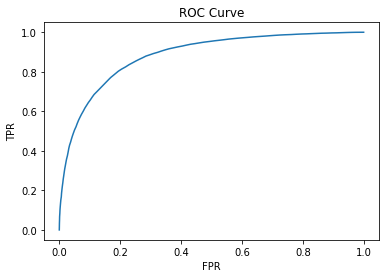

In [ ]:
fpr = lr_pipe_2.stages[-1].summary.roc.select('FPR').collect()
tpr = lr_pipe_2.stages[-1].summary.roc.select('TPR').collect()

plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

In order to plot a ROC curve, True Positive Rate (TPR) and False Positive Rate (FPR) need to be calculated from the confusion matrix. TPR is calculated by dividing the True Positive by true condition positive. The formula for FPR is 1-(TNR), which is 1-(True Negative / true condition negative). TPR and FPR are calculated across the range of threshold where the threshold is compared against the model probability prediction. Then, the resulting data is plotted as TPR in y axis and FPR in x axis. 

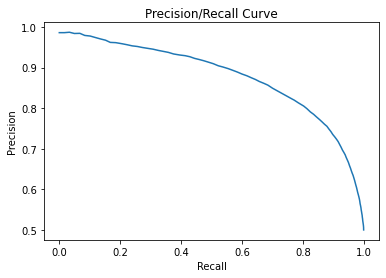

In [ ]:
recall = lr_pipe_2.stages[-1].summary.pr.select('recall').collect()
precision = fpr = lr_pipe_2.stages[-1].summary.pr.select('precision').collect()

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision/Recall Curve')
plt.show()


*   In Precision / Recall curve, recall is equivalent to TPR in the ROC curve.Precision is calculated by dividing TP by predicted condition positive. Both ROC curve and Precision/Recall curve are useful tool for evaluating binary classification model. Both ROC curve and Precision/Recall curve have TPR or recall axis. 
*   Precision axis is used in PR curve and FPR is used in ROC curve. This means, in terms of calculation, PR curve does not deal with True Negative in any ways. ROC curve is more useful when there is roughly equal number of observations for each class. In contrast, Precision/Recall curve should be used when there is a moderate to large class imbalance. 


